# Plot coupling coefficients

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean.cm as cmo

## Load data

In [19]:
corr_sst_speed_hp = xr.open_dataarray('/home/b/b382473/corr_sst_speed.nc').load()
corr_sst_speed_full = xr.open_dataarray('/home/b/b382473/corr_sst_speed_full.nc').load()
corr_sst_speed_lp = xr.open_dataarray('/home/b/b382473/corr_sst_speed_lp.nc').load()

In [20]:
corr_downT_winddiv_hp = xr.open_dataarray('/home/b/b382473/corr_downT_winddiv.nc').load()
corr_downT_winddiv_full = xr.open_dataarray('/home/b/b382473/corr_downT_winddiv_full.nc').load()
corr_downT_winddiv_lp = xr.open_dataarray('/home/b/b382473/corr_downT_winddiv_lp.nc').load()

## Plot

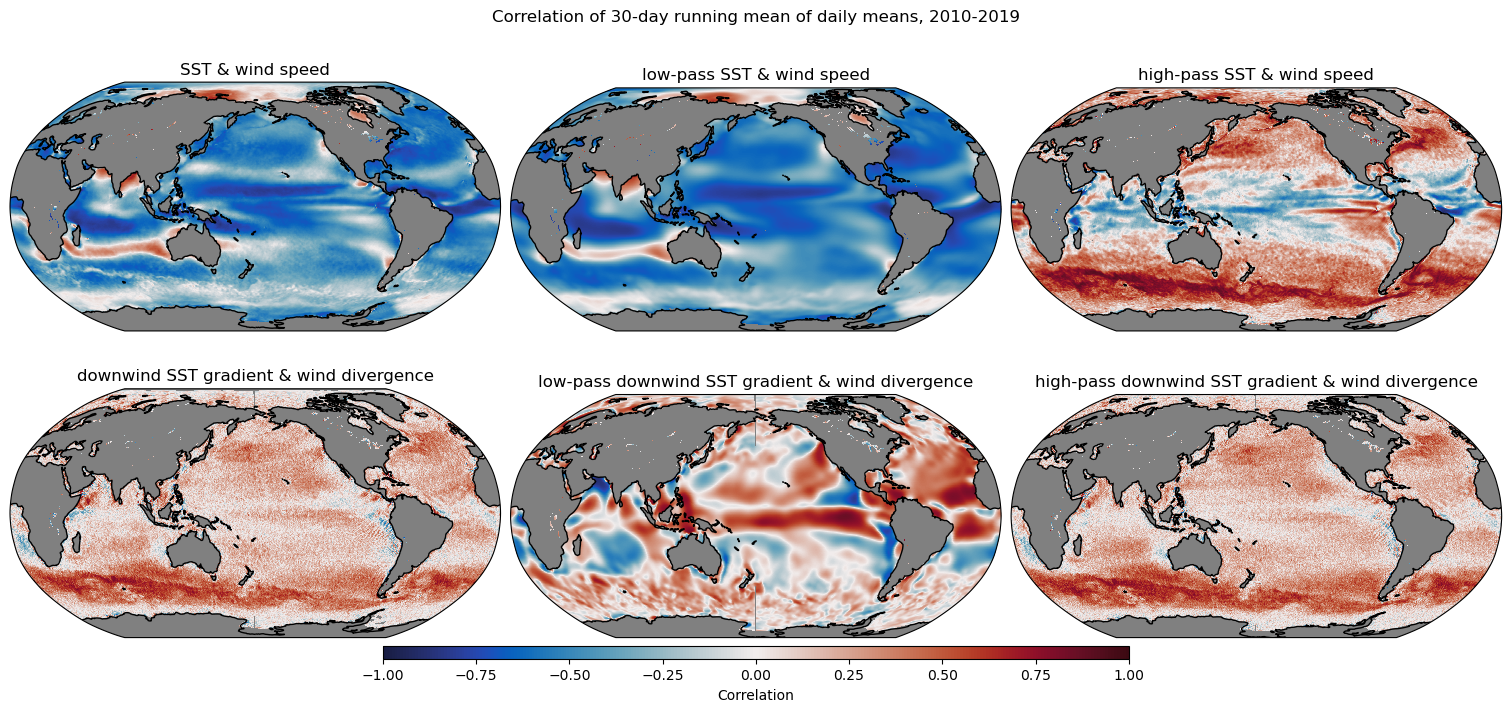

In [22]:
fig, axs = plt.subplots(2,3,figsize=(15,7),constrained_layout=True,subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180)))
ax = axs.flatten()

p = corr_sst_speed_full.plot(
    vmax=1,cmap=cmo.balance,add_colorbar=False,rasterized=True,transform=ccrs.PlateCarree(),ax=ax[0]
)
corr_sst_speed_lp.plot(
    vmax=1,cmap=cmo.balance,add_colorbar=False,rasterized=True,transform=ccrs.PlateCarree(),ax=ax[1]
)
corr_sst_speed_hp.plot(
    vmax=1,cmap=cmo.balance,add_colorbar=False,rasterized=True,transform=ccrs.PlateCarree(),ax=ax[2]
)

corr_downT_winddiv_full.plot(
    vmax=1,cmap=cmo.balance,add_colorbar=False,rasterized=True,transform=ccrs.PlateCarree(),ax=ax[3]
)
corr_downT_winddiv_lp.plot(
    vmax=1,cmap=cmo.balance,add_colorbar=False,rasterized=True,transform=ccrs.PlateCarree(),ax=ax[4]
)
corr_downT_winddiv_hp.plot(
    vmax=1,cmap=cmo.balance,add_colorbar=False,rasterized=True,transform=ccrs.PlateCarree(),ax=ax[5]
)


cbar = fig.colorbar(p,ax=ax,orientation='horizontal',shrink=0.5,pad=0.0125,aspect=60,label='Correlation')

[axi.coastlines() for axi in ax]
[axi.set_facecolor('grey') for axi in ax]

ax[0].set_title('SST & wind speed')
ax[1].set_title('low-pass SST & wind speed')
ax[2].set_title('high-pass SST & wind speed')
ax[3].set_title('downwind SST gradient & wind divergence')
ax[4].set_title('low-pass downwind SST gradient & wind divergence')
ax[5].set_title('high-pass downwind SST gradient & wind divergence')

fig.suptitle('Correlation of 30-day running mean of daily means, 2010-2019')

fig.savefig('coupling_corr_10years.pdf')